# HANDS-ON 01

2023-03-31

Considerations:

- Range $[-1,2]$ to search for a specific root value
- Precision $ \ \varepsilon = 1 \cdot 10^{-6}$
- 50 iterations

## Bisection method

Starting from an initial interval ($x_1$, $x_2$), the bisection method reduces the interval by half, until it becomes small enough. It is not the fastest method to calculate roots, but it is the most reliable, since bisection will always find the root from the given interval.

If there is a root ($f(x)=0$) within the interval $(x_1, x_2)$, then $f(x_1)$ and $f(x_2)$ have opposite signs. To halve the range, we compute $f(x_3)$ using the midpoint of the range $x_3 = \frac 1 2 (x_1 + x_2)$. If $f(x_2)$ and $f(x_3)$ have opposite signs, then the root must be at $(x_2 , x_3)$, and the limit $x_1$ is replaced by $x_3$ . Otherwise, the root is within the boundary $(x_1, x_3)$, and $x_2$ is replaced by $x_3$ . In both cases, the new range $(x_1, x_2)$ will be half the size of the original range. The bisection is repeated until the interval is reduced to a small value $\varepsilon$, so that $|x_2-x_1| \le \varepsilon$.

The number of bisections needed to reach a prescribed $\varepsilon$ is given by the equation

$$ \displaystyle n = \frac{\ln(\frac{\Delta x}{\varepsilon})}{\ln 2} $$

### Code

In [11]:
import math as mt, numpy as np, matplotlib.pyplot as plt

In [12]:
tol = 1.0e-6    # error, tolerance
x1 = -1
x2 = 2
n = mt.ceil( mt.log( (x2 - x1) / tol) / mt.log(2) )
n

22

Equations:

In [13]:
u1_expr = "x - cos(x)"
def f1(x):
    return x - np.cos(x)

u2_expr = "x**3 - 9.0 * x**2 + 5.0"
def f2(x):
    return x**3 - 9.0 * x**2 + 5.0

u3_expr = "x * (3 - x**2) / 2.0"
def f3(x):
    return x * (3 - x**2) / 2.0

u4_expr = "(x**4 - 10 * x**2) * exp(-x) + 1"
def f4(x):
    return (x**4 - 10 * x**2) * np.exp(-x) + 1

u5_expr = "(4 * pi * x) - (400 * x**-2)"
def f5(x):
    return (4 * np.pi * x) - (400 * x**-2)

Main routine:

In [41]:
def bisection(f, x1, x2, tol):
    f1 = f(x1)
    if f1 == 0.0:
        return x1
    f2 = f(x2)
    if f2 == 0.0:
        return x2
    n = mt.ceil(mt.log((x2 - x1) / tol) / mt.log(2))
    a = np.empty(0)
    b = np.empty(0)
    print(f"Number of iterations: {n}")
    print(f" i     x        f(x)")
    print(f"---  -------   -------")
    for i in range(n):
        x3 = 0.5 * (x1 + x2)
        f3 = f(x3)
        print(f"{i+1:2}:  {x3:+#1.4f},  {f3:+#1.4f}")
        a = np.append(a, x3)
        b = np.append(b, f3)
        if f3 == 0.0:
            print(f"\nSolution:  x = {x3:+#.4f},  f(x) = {f3:+#.4f}")
            return a, b
        if np.sign(f2) != np.sign(f3):
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3
    print(f"\nSolution:  x = {x3:+#.4f},  f(x) = {f(x3):+#.4f}\n")
    return a, b

Plot:

In [19]:
x_plt = np.linspace(-1, 2, 100)

def curve(f, a, b, eq):
    plt.plot(x_plt, f(x_plt), '-r')
    plt.scatter(a, b, color='green')
    plt.title("f(x) = " + eq)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.axhline(y=0, color='black')
    plt.axvline(x=0, color='black')
    plt.show()

## Equation 1

In [42]:
%%timeit -r 1 -n 1
a, b = bisection(f1, x1 = -1.0, x2 = 2.0, tol = 1.0e-6)

Number of iterations: 22
 i     x        f(x)
---  -------   -------
 1:  +0.5000,  -0.3776
 2:  +1.2500,  +0.9347
 3:  +0.8750,  +0.2340
 4:  +0.6875,  -0.0853
 5:  +0.7812,  +0.0712
 6:  +0.7344,  -0.0079
 7:  +0.7578,  +0.0315
 8:  +0.7461,  +0.0117
 9:  +0.7402,  +0.0019
10:  +0.7373,  -0.0030
11:  +0.7388,  -0.0005
12:  +0.7395,  +0.0007
13:  +0.7391,  +0.0001
14:  +0.7390,  -0.0002
15:  +0.7390,  -0.0001
16:  +0.7391,  +0.0000
17:  +0.7391,  -0.0000
18:  +0.7391,  -0.0000
19:  +0.7391,  -0.0000
20:  +0.7391,  +0.0000
21:  +0.7391,  +0.0000
22:  +0.7391,  -0.0000

Solution:  x = +0.7391,  f(x) = -0.0000

1.65 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


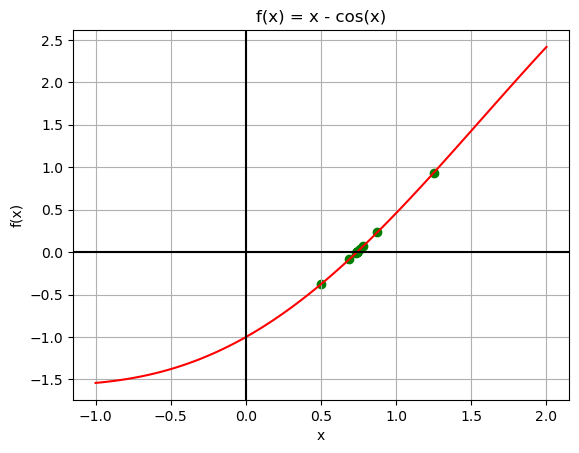

In [23]:
curve(f1, a, b, u1_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 2

In [44]:
%%timeit -r 1 -n 1
a, b = bisection(f2, x1 = -1.0, x2 = 2, tol = 1.0e-6)

Number of iterations: 22
 i     x        f(x)
---  -------   -------
 1:  +0.5000,  +2.8750
 2:  +1.2500,  -7.1094
 3:  +0.8750,  -1.2207
 4:  +0.6875,  +1.0710
 5:  +0.7812,  -0.0163
 6:  +0.7344,  +0.5423
 7:  +0.7578,  +0.2667
 8:  +0.7695,  +0.1261
 9:  +0.7754,  +0.0551
10:  +0.7783,  +0.0195
11:  +0.7798,  +0.0016
12:  +0.7805,  -0.0074
13:  +0.7802,  -0.0029
14:  +0.7800,  -0.0007
15:  +0.7799,  +0.0005
16:  +0.7799,  -0.0001
17:  +0.7799,  +0.0002
18:  +0.7799,  +0.0000
19:  +0.7799,  -0.0000
20:  +0.7799,  +0.0000
21:  +0.7799,  -0.0000
22:  +0.7799,  -0.0000

Solution:  x = +0.7799,  f(x) = -0.0000

2.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


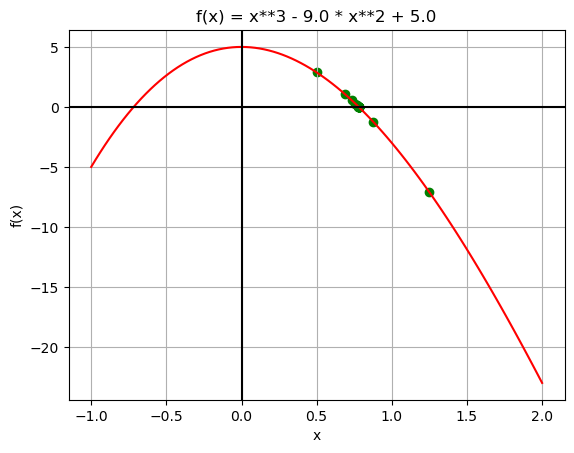

In [27]:
curve(f2, a, b, u2_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

In [45]:
%%timeit -r 1 -n 1
a, b = bisection(f2, x1 = -1.0, x2 = 0, tol = 1.0e-6)

Number of iterations: 20
 i     x        f(x)
---  -------   -------
 1:  -0.5000,  +2.6250
 2:  -0.7500,  -0.4844
 3:  -0.6250,  +1.2402
 4:  -0.6875,  +0.4211
 5:  -0.7188,  -0.0207
 6:  -0.7031,  +0.2029
 7:  -0.7109,  +0.0918
 8:  -0.7148,  +0.0357
 9:  -0.7168,  +0.0075
10:  -0.7178,  -0.0066
11:  -0.7173,  +0.0005
12:  -0.7175,  -0.0031
13:  -0.7174,  -0.0013
14:  -0.7173,  -0.0004
15:  -0.7173,  +0.0000
16:  -0.7173,  -0.0002
17:  -0.7173,  -0.0001
18:  -0.7173,  -0.0000
19:  -0.7173,  +0.0000
20:  -0.7173,  -0.0000

Solution:  x = -0.7173,  f(x) = -0.0000

3.25 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


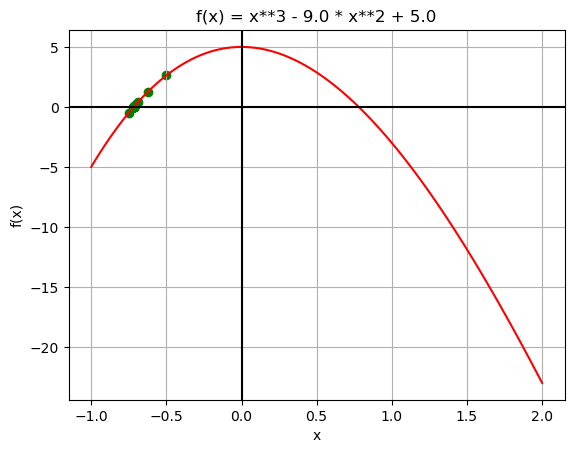

In [29]:
curve(f2, a, b, u2_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 3

In [46]:
%%timeit -r 1 -n 1
a, b = bisection(f3, x1 = -1.0, x2 = 2.0, tol = 1.0e-6)

Number of iterations: 22
 i     x        f(x)
---  -------   -------
 1:  +0.5000,  +0.6875
 2:  +1.2500,  +0.8984
 3:  +1.6250,  +0.2920
 4:  +1.8125,  -0.2584
 5:  +1.7188,  +0.0394
 6:  +1.7656,  -0.1037
 7:  +1.7422,  -0.0307
 8:  +1.7305,  +0.0047
 9:  +1.7363,  -0.0129
10:  +1.7334,  -0.0040
11:  +1.7319,  +0.0004
12:  +1.7327,  -0.0018
13:  +1.7323,  -0.0007
14:  +1.7321,  -0.0002
15:  +1.7320,  +0.0001
16:  +1.7321,  -0.0001
17:  +1.7320,  +0.0000
18:  +1.7321,  -0.0000
19:  +1.7321,  -0.0000
20:  +1.7321,  -0.0000
21:  +1.7320,  +0.0000
22:  +1.7321,  +0.0000

Solution:  x = +1.7321,  f(x) = +0.0000

3.08 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


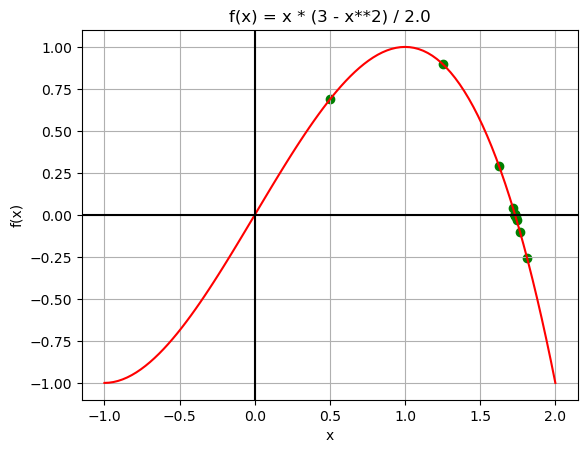

In [31]:
curve(f3, a, b, u3_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

In [32]:
a, b = bisection(f3, x1 = -1.0, x2 = 1.0, tol = 1.0e-6)

Number of iterations: 21
 i     x        f(x)
---  -------   -------
 1:  +0.0000,  +0.0000

Solution:  x = +0.0000,  f(x) = +0.0000


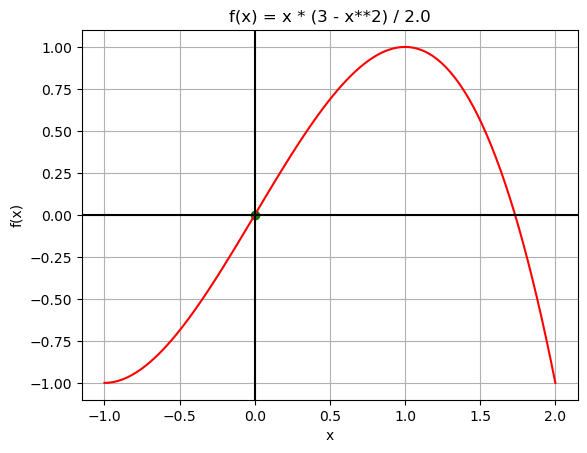

In [33]:
curve(f3, a, b, u3_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 4

In [47]:
%%timeit -r 1 -n 1
a, b = bisection(f4, x1 = -1.0, x2 = 2.0, tol = 1.0e-6)

Number of iterations: 22
 i     x        f(x)
---  -------   -------
 1:  +0.5000,  -0.4784
 2:  -0.2500,  +0.2025
 3:  +0.1250,  +0.8623
 4:  +0.3125,  +0.2925
 5:  +0.4062,  -0.0813
 6:  +0.3594,  +0.1100
 7:  +0.3828,  +0.0153
 8:  +0.3945,  -0.0328
 9:  +0.3887,  -0.0087
10:  +0.3857,  +0.0033
11:  +0.3872,  -0.0027
12:  +0.3865,  +0.0003
13:  +0.3868,  -0.0012
14:  +0.3867,  -0.0004
15:  +0.3866,  -0.0001
16:  +0.3865,  +0.0001
17:  +0.3865,  +0.0000
18:  +0.3866,  -0.0000
19:  +0.3865,  +0.0000
20:  +0.3866,  +0.0000
21:  +0.3866,  -0.0000
22:  +0.3866,  -0.0000

Solution:  x = +0.3866,  f(x) = -0.0000

2.47 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


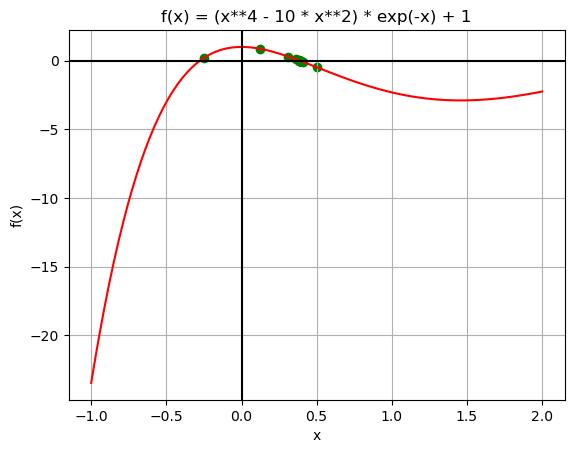

In [35]:
curve(f4, a, b, u4_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

In [48]:
%%timeit -r 1 -n 1
a, b = bisection(f4, x1 = -1.0, x2 = 0.10, tol = 1.0e-6)

Number of iterations: 21
 i     x        f(x)
---  -------   -------
 1:  -0.4500,  -2.1115
 2:  -0.1750,  +0.6363
 3:  -0.3125,  -0.3218
 4:  -0.2437,  +0.2464
 5:  -0.2781,  -0.0137
 6:  -0.2609,  +0.1221
 7:  -0.2695,  +0.0557
 8:  -0.2738,  +0.0214
 9:  -0.2760,  +0.0040
10:  -0.2771,  -0.0048
11:  -0.2765,  -0.0004
12:  -0.2762,  +0.0018
13:  -0.2764,  +0.0007
14:  -0.2764,  +0.0001
15:  -0.2765,  -0.0002
16:  -0.2765,  -0.0000
17:  -0.2765,  +0.0000
18:  -0.2765,  +0.0000
19:  -0.2765,  -0.0000
20:  -0.2765,  +0.0000
21:  -0.2765,  -0.0000

Solution:  x = -0.2765,  f(x) = -0.0000

2.46 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


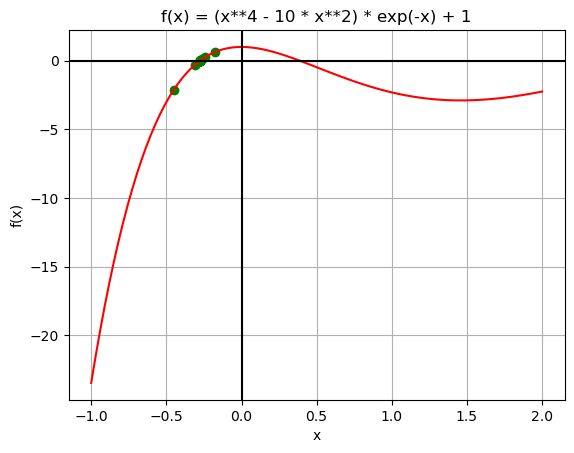

In [37]:
curve(f4, a, b, u4_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

## Equation 5

In [49]:
%%timeit -r 1 -n 1
a, b = bisection(f5, x1 = -1.0, x2 = 2.0, tol = 1.0e-6)

Number of iterations: 22
 i     x        f(x)
---  -------   -------
 1:  +0.5000,  -1593.7168
 2:  -0.2500,  -6403.1416
 3:  -0.6250,  -1031.8540
 4:  -0.8125,  -616.1273
 5:  -0.9062,  -498.4275
 6:  -0.9531,  -452.2891
 7:  -0.9766,  -431.7022
 8:  -0.9883,  -421.9615
 9:  -0.9941,  -417.2218
10:  -0.9971,  -414.8836
11:  -0.9985,  -413.7224
12:  -0.9993,  -413.1437
13:  -0.9996,  -412.8549
14:  -0.9998,  -412.7106
15:  -0.9999,  -412.6385
16:  -1.0000,  -412.6024
17:  -1.0000,  -412.5844
18:  -1.0000,  -412.5754
19:  -1.0000,  -412.5709
20:  -1.0000,  -412.5686
21:  -1.0000,  -412.5675
22:  -1.0000,  -412.5669

Solution:  x = -1.0000,  f(x) = -412.5669

2.17 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/tmp/ipykernel_48599/3463054139.py:21: RuntimeWarning: divide by zero encountered in power
  return (4 * np.pi * x) - (400 * x**-2)


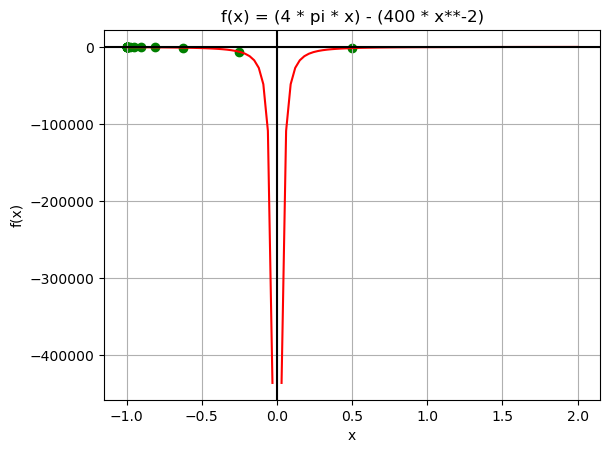

In [39]:
curve(f5, a, b, u5_expr)

The points on the curves represent each iteration until the zero of the function is obtained.

# References

KIUSALAAS, J. Numerical Methods in Engineering with Python 3. [S. l.]: Cambridge University Press, 2013.